# Release and recapture

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

<IPython.core.display.Javascript object>


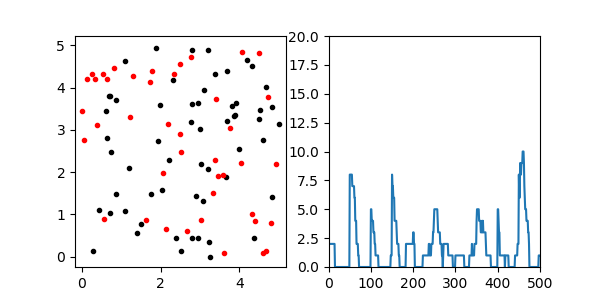

In [41]:
%matplotlib notebook

class Const():
    n = 100
    speed = 1
    w = 5
    h = 5
    borders = (1 , 1) # Mark-recapture zone
    dx = 0.1
    nsteps = 500
    
c = Const()
xy = np.random.uniform(size=(2,c.n))
xy = np.matmul(np.diag([c.w, c.h]),xy)
angle = np.random.uniform(size=c.n)*2*np.pi
v = np.vstack((np.cos(angle),np.sin(angle)))
z = np.zeros(c.n)

def step(xy,v,mode='square'):
    """Make a step"""
    xy += v*c.dx
    if mode=='torus':
        xy[0, xy[0,:]<0] += c.w
        xy[0, xy[0,:]>c.w] -= c.w
        xy[1, xy[1,:]<0] += c.h
        xy[1, xy[1,:]>c.h] -= c.h
    else:
        v[0,np.logical_or(xy[0,:]<0, xy[0,:]>c.w)] *= -1
        v[1,np.logical_or(xy[1,:]<0, xy[1,:]>c.h)] *= -1
        xy[0, xy[0,:]<0] = 0
        xy[0, xy[0,:]>c.w] = c.w
        xy[1, xy[1,:]<0] = 0
        xy[1, xy[1,:]>c.h] = c.h
    
def mark(xy,z,borders):
    """Mark agents inside the enclosure."""
    g = np.logical_and(xy[0,:] < borders[0] , xy[1,:] < borders[1])
    z[g] += 1
    
def count(xy, borders):
    """Number of marked agents within borders."""
    g = np.logical_and(xy[0,:] < borders[0] , xy[1,:] < borders[1])
    return sum(np.logical_and(g,z>0))

fig = plt.figure(figsize=(6,3))
ax1 = plt.subplot(121)
dots1, = ax1.plot(xy[0,:],xy[1,:],'k.');
dots2, = ax1.plot([],[],'r.')
ax2 = plt.subplot(122)
plt.xlim((0, c.nsteps))
plt.ylim((0, c.n*c.borders[0]/c.w))
line2, = ax2.plot([0],[0],'-')
plt.show()

# Main loop
history = np.zeros(c.nsteps)
for t in range(c.nsteps):
    if t % 50 == 0:
        mark(xy, z, c.borders)
    step(xy,v)
    history[t] = count(xy, c.borders)
    dots1.set_data(xy[0,z==0],xy[1,z==0])
    dots2.set_data(xy[0,z!=0],xy[1,z!=0])
    line2.set_data(np.arange(c.nsteps),history)
    fig.canvas.draw()
    time.sleep(0.02)
    
#plt.subplot(122)
#plt.plot(history)